In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

## Plots

In [61]:
def select_case(df, n):
    return df.loc[(df['data_n'] == n)]

df = pd.read_csv('results.csv', index_col=0)
df['graph_type_d'] = df.apply(lambda x: f"{x['graph_type'].upper()}{x['graph_d']}", axis=1)
df['id_up'] = df.apply(lambda x: x['id'].upper(), axis=1)

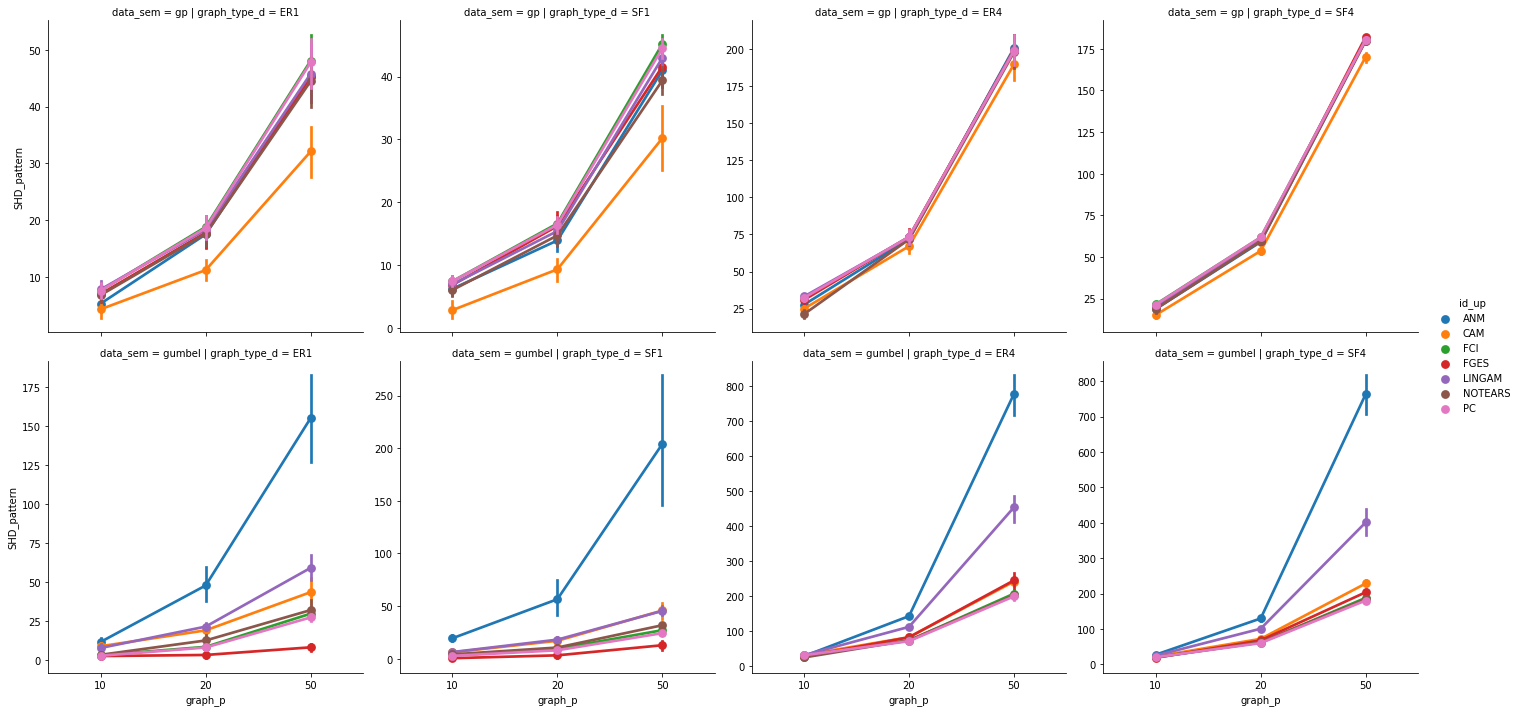

In [62]:
df_selected = select_case(df, 200)
sns.catplot(data=df_selected, x='graph_p', y='SHD_pattern', hue='id_up', col='graph_type_d', row='data_sem', errorbar='se', kind='point', sharey=False)

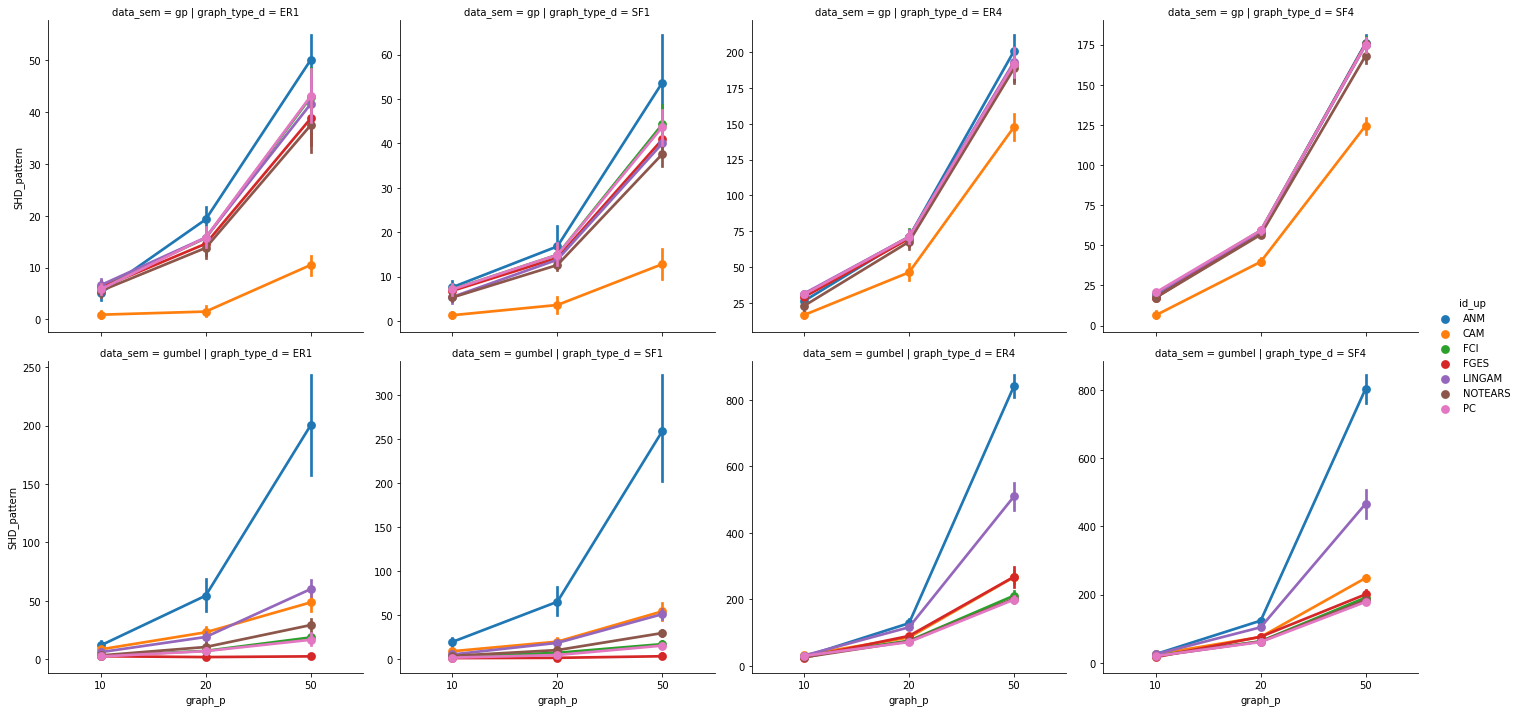

In [63]:
df_selected = select_case(df, 1000)
sns.catplot(data=df_selected, x='graph_p', y='SHD_pattern', hue='id_up', col='graph_type_d', row='data_sem', errorbar='se', kind='point', sharey=False)

## Tables -- mean (sem)

In [64]:
df = pd.read_csv('results.csv', index_col=0)
df['graph_type_d'] = df.apply(lambda x: f"{x['graph_type'].upper()}{x['graph_d']}", axis=1)
df['id_up'] = df.apply(lambda x: x['id'].upper(), axis=1)

df_agg = df.groupby(['id_up', 'graph_p', 'graph_type_d', 'data_sem', 'data_n'], as_index=False).agg(['mean', 'sem'])
df_agg.reset_index(inplace=True)

df_agg['SHD'] = df_agg.apply(lambda x: f"{x['SHD_pattern']['mean']} ({x['SHD_pattern']['sem']:.2f})", axis=1)

In [65]:
def select(df, gtd, p, sem, n):
    return df.loc[(df['graph_type_d'] == gtd) & (df['data_sem'] == sem) & (df['data_n'] == n) & (df['graph_p'] == p), ['id_up', 'SHD']]

def select_complex(df, gt, sem, n):
    gt1 = f'{gt.upper()}1'
    er1 = select(df, gt1, 10, sem, n).merge(select(df, gt1, 20, sem, n), on='id_up').merge(select(df, gt1, 50, sem, n), on='id_up')
    er1.columns = ['id', 'p=10', 'p=20', 'p=50']

    gt4 = f'{gt.upper()}4'
    er4 = select(df, gt4, 10, sem, n).merge(select(df, gt4, 20, sem, n), on='id_up').merge(select(df, gt4, 50, sem, n), on='id_up')
    er4.columns = ['id', 'p=10', 'p=20', 'p=50']

    er = er1.merge(er4, on='id', suffixes=[gt1, gt4])

    er.set_index('id', inplace=True)

    er.columns = pd.MultiIndex.from_tuples([(c[-3:], c[:-3]) for c in er.columns])

    return er

In [66]:
for sem in ['gumbel', 'gp']:
    for gt in ['er', 'sf']:
        for n in [200, 1000]:
            print()
            print('='*30)
            #print(sem, gt, n)
            if sem == 'gumbel':
                print(f"Linear + Gumbel noise, n = {n}")
            else:
                print(f"Nonlinear + Gaussian noise, n = {n}")
            display(select_complex(df_agg, gt, sem, n))
            print()


Linear + Gumbel noise, n = 200


ER1                                      ER4                \
                p=10         p=20           p=50         p=10          p=20   
id                                                                            
ANM      11.6 (1.41)  47.8 (5.87)  155.2 (15.38)  29.1 (2.69)  143.2 (1.72)   
CAM       8.8 (0.92)  19.0 (2.04)    43.5 (4.81)  32.0 (1.16)   83.1 (1.77)   
FCI       3.1 (0.82)   8.4 (1.11)    29.7 (1.56)  30.8 (0.68)   73.5 (2.67)   
FGES      2.5 (1.05)   3.2 (1.06)     8.1 (1.21)  27.6 (1.09)   82.9 (3.27)   
LINGAM    7.7 (1.31)  21.4 (1.33)    59.1 (4.20)  31.9 (1.95)  112.6 (2.84)   
NOTEARS   3.3 (0.45)  12.5 (1.75)    32.0 (3.22)  25.3 (1.97)   74.4 (2.54)   
PC        2.7 (0.79)   8.0 (0.91)    27.3 (1.09)  31.5 (0.85)   71.8 (2.91)   

                        
                  p=50  
id                      
ANM      777.6 (30.79)  
CAM       241.9 (7.28)  
FCI       207.4 (6.47)  
FGES     245.3 (11.14)  
LINGAM   453.9 (20.24)  
NOTEARS   202.1 (4.87)  
PC        199.7 (5.85)



Linear + Gumbel noise, n = 1000


ER1                                      ER4                \
                p=10         p=20           p=50         p=10          p=20   
id                                                                            
ANM      11.8 (1.78)  54.4 (7.62)  200.3 (23.35)  27.5 (2.48)  128.4 (5.82)   
CAM       8.4 (0.92)  23.0 (2.56)    48.6 (4.10)  32.5 (0.93)   85.5 (1.87)   
FCI       2.9 (0.92)   7.1 (1.67)    18.6 (2.30)  30.2 (0.59)   75.5 (2.84)   
FGES      2.5 (1.07)   1.8 (0.90)     2.4 (0.90)  24.9 (1.83)   90.1 (3.61)   
LINGAM    6.0 (1.58)  19.0 (2.12)    60.0 (3.65)  31.0 (2.56)  116.2 (3.58)   
NOTEARS   3.2 (0.71)  10.4 (1.87)    29.2 (3.04)  25.9 (1.75)   74.1 (2.39)   
PC        2.3 (0.79)   6.9 (1.45)    16.6 (2.66)  30.0 (0.75)   71.8 (2.53)   

                        
                  p=50  
id                      
ANM      841.7 (18.44)  
CAM       267.3 (9.44)  
FCI       211.3 (6.74)  
FGES     268.0 (15.92)  
LINGAM   509.8 (21.66)  
NOTEARS   202.1 (4.87)  
PC        199.5 (6.02)



Linear + Gumbel noise, n = 200


SF1                                      SF4                \
                p=10         p=20           p=50         p=10          p=20   
id                                                                            
ANM      19.4 (1.48)  56.5 (9.07)  204.0 (34.59)  27.3 (0.87)  129.7 (3.80)   
CAM       6.1 (1.49)  17.0 (1.99)    45.8 (3.94)  22.2 (1.02)   72.0 (1.74)   
FCI       3.1 (0.67)   9.4 (0.76)    27.1 (1.87)  20.5 (0.76)   61.6 (1.22)   
FGES      0.5 (0.27)   3.2 (1.58)    12.8 (2.28)  18.5 (1.39)   67.8 (1.92)   
LINGAM    6.3 (1.26)  18.1 (1.44)    45.4 (2.19)  24.8 (0.96)  100.7 (2.99)   
NOTEARS   4.1 (0.60)  10.6 (1.17)    31.8 (1.44)  19.5 (0.73)   62.6 (0.40)   
PC        2.7 (0.56)   8.0 (0.92)    24.3 (1.12)  20.3 (0.62)   60.1 (1.22)   

                        
                  p=50  
id                      
ANM      763.1 (30.32)  
CAM       228.5 (4.93)  
FCI       187.9 (1.36)  
FGES      203.7 (4.04)  
LINGAM   401.0 (20.20)  
NOTEARS   184.0 (0.00)  
PC        180.4 (1.56)



Linear + Gumbel noise, n = 1000


SF1                                      SF4                \
                p=10         p=20           p=50         p=10          p=20   
id                                                                            
ANM      19.1 (2.39)  64.8 (8.56)  259.0 (34.85)  25.5 (1.20)  123.6 (4.69)   
CAM       8.5 (1.68)  19.4 (2.27)    53.9 (5.16)  25.1 (1.47)   75.8 (1.01)   
FCI       1.9 (0.59)   6.7 (1.18)    16.6 (1.77)  20.7 (0.82)   63.1 (1.17)   
FGES      0.7 (0.70)   1.0 (0.89)     2.8 (1.72)  16.5 (2.27)   76.4 (3.30)   
LINGAM    4.8 (0.90)  18.0 (1.45)    50.7 (2.91)  25.1 (1.88)  104.2 (2.76)   
NOTEARS   3.2 (0.71)   9.8 (1.57)    29.2 (1.79)  19.3 (0.72)   62.5 (0.43)   
PC        1.2 (0.63)   4.2 (0.93)    14.9 (1.46)  20.0 (1.06)   61.0 (1.19)   

                        
                  p=50  
id                      
ANM      803.4 (22.65)  
CAM       248.6 (4.87)  
FCI       191.2 (2.19)  
FGES      200.7 (7.84)  
LINGAM   466.3 (21.49)  
NOTEARS   184.0 (0.00)  
PC        178.6 (1.40)



Nonlinear + Gaussian noise, n = 200


ER1                                    ER4               \
               p=10         p=20         p=50         p=10         p=20   
id                                                                        
ANM      5.3 (0.79)  17.5 (1.22)  45.4 (2.07)  27.7 (0.98)  71.8 (2.37)   
CAM      4.3 (1.01)  11.2 (0.92)  32.1 (2.35)  25.0 (1.03)  67.1 (2.66)   
FCI      7.6 (0.76)  18.8 (1.06)  48.1 (2.44)  32.1 (1.00)  73.2 (2.40)   
FGES     7.0 (0.77)  17.8 (1.35)  45.2 (2.37)  30.9 (0.97)  73.4 (2.53)   
LINGAM   7.8 (0.76)  18.3 (1.08)  45.8 (2.57)  33.2 (0.80)  73.0 (2.27)   
NOTEARS  6.8 (0.57)  17.6 (1.08)  44.5 (2.32)  21.3 (1.51)  71.7 (2.18)   
PC       7.6 (0.76)  18.6 (1.06)  47.8 (2.31)  32.3 (1.00)  73.4 (2.38)   

                       
                 p=50  
id                     
ANM      200.7 (5.06)  
CAM      189.7 (6.18)  
FCI      198.9 (5.39)  
FGES     199.6 (5.19)  
LINGAM   199.3 (5.10)  
NOTEARS  197.8 (5.17)  
PC       198.7 (5.42)



Nonlinear + Gaussian noise, n = 1000


ER1                                    ER4               \
               p=10         p=20         p=50         p=10         p=20   
id                                                                        
ANM      5.1 (0.71)  19.3 (1.32)  50.1 (3.01)  26.2 (1.13)  70.9 (1.56)   
CAM      0.9 (0.38)   1.5 (0.52)  10.5 (1.05)  16.4 (1.28)  46.2 (3.00)   
FCI      6.2 (0.59)  15.7 (1.15)  42.9 (2.75)  30.4 (0.72)  71.1 (2.47)   
FGES     6.1 (0.69)  14.6 (1.24)  38.8 (2.66)  29.0 (0.75)  69.8 (2.89)   
LINGAM   6.6 (0.56)  15.8 (1.09)  41.6 (2.70)  31.4 (0.75)  71.0 (2.36)   
NOTEARS  5.5 (0.65)  13.8 (1.11)  37.5 (2.85)  22.8 (1.57)  67.6 (2.81)   
PC       5.8 (0.55)  15.8 (1.06)  43.1 (2.77)  30.8 (0.77)  71.0 (2.49)   

                       
                 p=50  
id                     
ANM      200.9 (5.86)  
CAM      147.8 (5.11)  
FCI      191.9 (5.70)  
FGES     191.5 (6.21)  
LINGAM   193.3 (5.48)  
NOTEARS  188.7 (5.79)  
PC       192.0 (5.57)



Nonlinear + Gaussian noise, n = 200


SF1                                    SF4               \
               p=10         p=20         p=50         p=10         p=20   
id                                                                        
ANM      6.2 (0.49)  13.9 (0.92)  41.0 (1.37)  18.7 (0.83)  59.0 (0.68)   
CAM      2.8 (0.77)   9.3 (0.94)  30.2 (2.68)  15.1 (1.11)  53.6 (1.19)   
FCI      7.4 (0.43)  16.6 (0.72)  45.2 (0.92)  21.5 (0.27)  61.7 (0.52)   
FGES     6.8 (0.44)  16.2 (1.15)  41.6 (1.54)  20.0 (0.68)  59.8 (0.66)   
LINGAM   6.9 (0.35)  15.4 (0.62)  43.0 (0.83)  20.5 (0.56)  61.0 (0.39)   
NOTEARS  6.0 (0.58)  14.7 (0.87)  39.4 (1.21)  18.7 (1.13)  59.5 (0.43)   
PC       7.4 (0.43)  16.4 (0.70)  44.5 (0.85)  21.3 (0.30)  61.8 (0.47)   

                       
                 p=50  
id                     
ANM      180.6 (1.42)  
CAM      170.2 (1.39)  
FCI      180.4 (0.93)  
FGES     182.2 (0.74)  
LINGAM   180.3 (0.50)  
NOTEARS  179.8 (0.81)  
PC       180.5 (0.95)



Nonlinear + Gaussian noise, n = 1000


SF1                                    SF4               \
               p=10         p=20         p=50         p=10         p=20   
id                                                                        
ANM      7.6 (0.72)  16.8 (2.24)  53.7 (5.24)  17.9 (0.77)  58.8 (1.12)   
CAM      1.3 (0.37)   3.6 (0.95)  12.8 (1.82)   6.4 (1.19)  39.7 (1.23)   
FCI      7.1 (0.71)  14.9 (1.18)  44.3 (2.38)  19.9 (0.75)  59.2 (1.10)   
FGES     6.8 (0.53)  14.2 (1.32)  40.9 (1.95)  17.4 (0.79)  58.4 (0.99)   
LINGAM   5.4 (0.67)  13.8 (0.53)  40.0 (1.58)  19.8 (0.61)  58.6 (0.70)   
NOTEARS  5.3 (0.52)  12.6 (0.56)  37.6 (1.47)  17.4 (0.64)  56.6 (0.79)   
PC       7.1 (0.71)  14.9 (1.29)  43.7 (2.22)  20.6 (0.91)  59.3 (1.11)   

                       
                 p=50  
id                     
ANM      176.1 (2.92)  
CAM      124.6 (2.68)  
FCI      175.3 (2.32)  
FGES     175.5 (1.48)  
LINGAM   174.8 (1.89)  
NOTEARS  168.2 (2.44)  
PC       175.1 (2.32)

## TODO

- default hyperparams
- selection strategies:
    - best per seed (done)
    - average best across seeds
    - average best across all DGPs